In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr/')
print(os.getcwd())

/home/vco/Projects/pm4py-dcr/notebooks_projects
/home/vco/Projects/pm4py-dcr


In [2]:
import pm4py
import pandas as pd
import networkx as nx

from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.objects.dcr.importer import importer as dcr_importer
from pm4py.objects.dcr.exporter import exporter as dcr_exporter
from pm4py.algo.conformance.dcr import algorithm as rule_based_conformance
from pm4py.algo.conformance.alignments.dcr import algorithm as dcr_alignment

# What is the point of this?
Test cases are useful to create better models.
When specifications change then the process model changes. (is extended)
Some test cases will fail because the process model changed. 
Those tests need to be revised.
Based on this work we define clearly which tests need or not to be revised. Here we use the concept of open tests.
Transparent process extensions preserve positive tests. These are defined based on safe activities which are further defined based on the dependency graph.
Exclusion safe extensions preserve negative tests.

In alignments, we think about moves: synchronous, log or model. For each move we have an associated cost defined according to a cost function. When possible we avoid model moved because they are expensive.

Doing regression testing on the extended model (running the tests), maps to the alignment problem with a specific cost function.

Reachability by model moves.

Satisfiability by model moves.

Does an extending a model allow also for removal of events and relations?

How does doing model checking on the marking state space relate to this? In essence construct a labelled transition system from the set of all possible markings.

What is the equivalent problem when translated to a buchi automata and an omega regular language?

What are the tricks from model checking and automata theory that can help us with the reachability analysis or satisfiability?



# The point of the running example

Show that we have an initial Dreyers model G and an extended Dreyers model G'.

We also have a set of initial positive and negative tests. All tests are passing initially.

On the extended G' we have made some changes that preserve by definition the positive tests and preserve by definition the negative tests. All pass by definition.

We have also made some unsafe changes that are not transparent therefore they break some positive tests. And changes that are not exclusion safe therefore they break the negative tests. 

We run the alignment on those to see if the tests pass for the extended model.

We want to verify that no trace can be found for failing positive tests and passing negative tests. 

This is what is done with alignment. We give an example that its doable or guarantees that there can never be a trace that satisfies this test (passing negative test).

Model checking to see if they hold or not. We do alignment because it maps neatly for the model checking problem of reachability and satisfiability.

# Dreyers Model 1

In [10]:
dreyers = dcr_importer.apply('models/dreyers2024en.xml',parameters={'as_dcr_object':True,'labels_as_ids':True,
    'white_space_replacement':' '})

In [11]:
dcr_exporter.apply(dreyers,'models/dreyers.xml')

In [7]:
all_events = {'Abort application',
 'Account number changed',
 'Anonymize data',
 'Applicant informed',
 'Applicant send documentation for payment',
 'Approve - send to board',
 'Approve application',
 'Approve changed account number',
 'Architect Review',
 'Change Phase to End Report',
 'Change Phase to Payout',
 'Change phase to Abort',
 'Change phase to Approved',
 'Change phase to Board meeting',
 'Change phase to Complete',
 'Change phase to review',
 'Completed',
 'End report',
 'Execute pre-decision',
 'Fill out Application',
 'First payment',
 'Inform applicant about application',
 'Inform applicant that board reviews the application',
 'Lawyer Review',
 'Meeting in progress',
 'Payment completed',
 'Payout',
 'Pre-approve application',
 'Receive end report',
 'Register Decision',
 'Reject',
 'Reject application',
 'Review',
 'Round Ends',
 'Round approved',
 'Set to Pre-approved',
 'Undo payment'}

Positive test cases and their context:

In [ ]:
p0 = {'sequence':[''],'context':all_events,'description':'rejected full context'}
p1 = {'sequence':[],'context':{},'description':'completed'}

Negative test cases and their context:

In [34]:
import json
# Serializing json
def set_default(obj):
    if isinstance(obj, set):
        return list(obj)
    raise TypeError
# to_json_dict = {'metadata': metadata, 'tests': tests}
# json_object = json.dumps(to_json_dict, indent=4,default=set_default)

# Writing to sample.json
# with open("models/open_tests_with_metadata.json", "w") as outfile:
#     outfile.write(json_object)
    
json_object = json.dumps(tests, indent=4,default=set_default)

# Writing to sample.json
with open("models/open_tests.json", "w") as outfile:
    outfile.write(json_object)

# Something UO/EO
Roles: Union, UO (Union Organization), EO (Employer Organization)

In [118]:
original = dcr_importer.apply('models/lodaoriginal.xml',parameters={'as_dcr_object':True,'labels_as_ids':True})
refined = dcr_importer.apply('models/lodarefinement.xml',parameters={'as_dcr_object':True,'labels_as_ids':True})

In [113]:
t0 = pd.DataFrame({'case:concept:name':[0,0,0],'concept:name':[cc,pmd,hm]})

In [131]:
t0r = pd.DataFrame({'case:concept:name':[0,0,0,0,0,0],'concept:name':[am,cc,aci,pmd,acc,hm]})
t0r

,case:concept:name,concept:name
0,0,Addmetadata
1,0,CreateCase
2,0,Assigncaseid
3,0,UOProposemeetingdates
4,0,EOAccept
5,0,Holdmeeting


In [120]:
dcr_alignment.apply(t0,original)

[{'alignment': [('CreateCase', 'CreateCase'),
   ('UOProposemeetingdates', 'UOProposemeetingdates'),
   ('Holdmeeting', 'Holdmeeting')],
  'cost': 0,
  'visited_states': 6,
  'closed': 4,
  'global_min': 0,
  'fitness': 1.0,
  'bwc': 3}]

In [134]:
dcr_alignment.apply(t0r,refined)

[{'alignment': [('Addmetadata', 'Addmetadata'),
   ('CreateCase', 'CreateCase'),
   ('Assigncaseid', 'Assigncaseid'),
   ('UOProposemeetingdates', 'UOProposemeetingdates'),
   ('EOAccept', 'EOAccept'),
   ('Holdmeeting', 'Holdmeeting')],
  'cost': 0,
  'visited_states': 9,
  'closed': 7,
  'global_min': 0,
  'fitness': 1.0,
  'bwc': 6}]

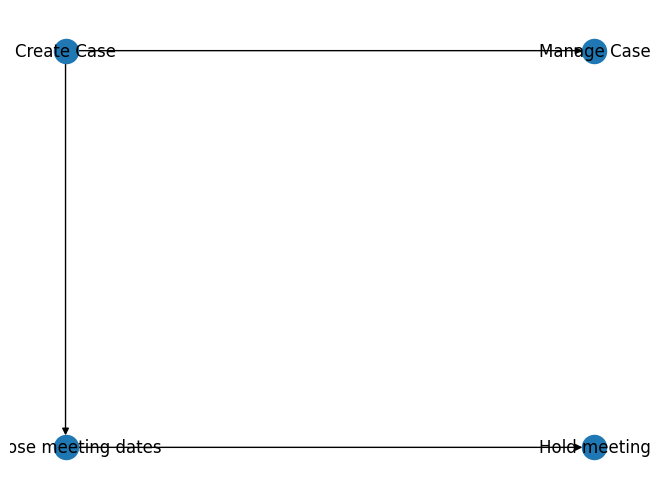

In [35]:
G = nx.DiGraph()
G.add_nodes_from([(cc,{'level':1,"h":0}),(mc,{'level':3,"h":0}),(pmd,{'level':1,"h":0}),(hm,{'level':3,"h":0})])
G.add_edge(cc,mc)
G.add_edge(cc,pmd)
G.add_edge(pmd,hm)
pos = nx.multipartite_layout(G, subset_key="level")
nx.draw(G, with_labels=True,pos=pos)

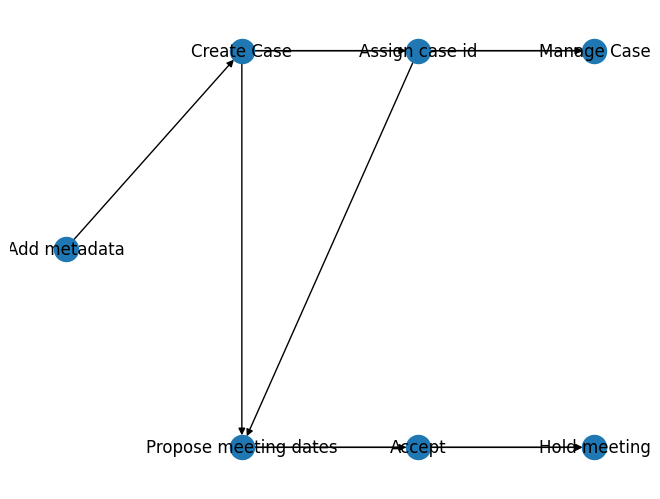

In [39]:
G.add_nodes_from([(am,{'level':0,'h':1}),(aci,{'level':2,'h':1}),(acc,{'level':2,'h':1})])
G.add_edge(am,cc)
G.add_edge(cc,aci)
G.add_edge(aci,mc)
G.add_edge(aci,pmd)
G.add_edge(pmd,acc)
G.add_edge(acc,hm)
pos = nx.multipartite_layout(G, subset_key="level")
nx.draw(G, with_labels=True,pos=pos)

In [12]:
benchmarking = dcr_importer.apply('models/loda_for_benchmarking.xml',parameters={
    'as_dcr_object':True,
    'labels_as_ids':False,
    'white_space_replacement':' '})

In [13]:
benchmarking

events: {'Activity1', 'Activity9', 'Activity14', 'Activity11', 'Activity15', 'Activity17', 'Activity13', 'Activity12', 'Activity18', 'Activity19', 'Activity21', 'Activity0', 'Activity3', 'Activity16', 'Activity4', 'Activity2', 'Activity11_1', 'Activity10', 'Activity20', 'Activity8', 'Activity7', 'Activity22', 'Activity6'}
marking: {executed: set(), included: {'Activity1', 'Activity9', 'Activity14', 'Activity11', 'Activity15', 'Activity17', 'Activity13', 'Activity12', 'Activity18', 'Activity21', 'Activity0', 'Activity3', 'Activity16', 'Activity4', 'Activity2', 'Activity11_1', 'Activity10', 'Activity22', 'Activity6'}, pending: set()}
labels: {'Create Case', 'Hold meeting', 'EO Accept', 'Add metadata', 'Manage Case', 'Document Management', 'EO Propose dates', 'Add meeting date', 'Report case to Labour Court', 'LC Document management', 'Edit metadata', 'Upload document', 'Assign case id and transfer case', 'Cancel meeting', 'Download document', 'UO Propose meeting dates', 'UO Accept', 'EO 

In [14]:
benchmarking.labels

{'Add meeting date',
 'Add metadata',
 'Assign case id and transfer case',
 'Cancel meeting',
 'Create Case',
 'Document Management',
 'Download document',
 'EO Accept',
 'EO Propose dates',
 'EO Report case to Labour Court',
 'Edit metadata',
 'Hold meeting',
 'LC Document management',
 'Manage Case',
 'Report case to Labour Court',
 'UO Accept',
 'UO Propose meeting dates',
 'UO Report case to Labour Court',
 'Upload document'}

In [19]:
metadata = {
    'all_activities' : {'Add meeting date', 'Add metadata', 'Assign case id and transfer case', 'Cancel meeting', 'Create Case', 'Download document', 'EO Accept', 'EO Propose dates', 'EO Report case to Labour Court', 'Edit metadata', 'Hold meeting', 'UO Accept', 'UO Propose meeting dates', 'UO Report case to Labour Court', 'Upload document'},
    'uo_context' : {'Assign case id and transfer case', 'Download document', 'Edit metadata', 'Hold meeting', 'UO Accept', 'UO Propose meeting dates', 'UO Report case to Labour Court', 'Upload document'},
    'eo_context' : {'Download document', 'EO Accept', 'EO Propose dates', 'EO Report case to Labour Court', 'Edit metadata', 'Upload document'},
    'union_context' : {'Add meeting date', 'Add metadata', 'Create Case', 'Download document', 'Edit metadata', 'Upload document'},
    'running_example_context': {'Create Case','Edit metadata','UO Propose meeting dates','EO Propose dates', 'Hold meeting'}
}

# Benchmarking test cases

In [12]:
md = 'Add metadata'
cc = 'Create Case'
mc = 'Upload document'
pmd = 'UO Propose meeting dates'
eopmd = 'EO Propose dates'
hm = 'Hold meeting'
cm = 'Cancel meeting'
ac = 'EO Accept'
uoac = 'UO Accept'
uud = 'Union Upload document'
uoud = 'UO Upload document'
eoud = 'EO Upload document'
lcud = 'LC Upload document'
udd = 'Union Download document'
amd = 'Add meeting date'
uolc = 'UO Report case to Labour court'
eolc = 'EO Report case to Labour court'
aci = 'Assign case id and transfer case'
n= 'Name'
a = 'Address'
eon = 'EO Edit name'
eoa = 'EO Edit address'
lcdd = 'LC Download document'

In [6]:
t_number_pos_or_neg = {'trace':[], 'context': {},'polarity':'+','description': '','id':''}

In [29]:
t0pos = {'trace':[cc,pmd,hm], 'context': {cc,pmd,hm},'polarity':'+','description': 'pos t0 running example','id':'t0pos'}
t1neg = {'trace':[hm], 'context': {cc,hm},'polarity':'-','description':'neg t1 running example','id':'t1neg'}
t2pos = {'trace': [cc], 'context':{cc,hm},'polarity':'+','description':'pos t2 running example','id':'t2pos'}
t3neg = {'trace':[cc,pmd,hm], 'context': {n,cc,pmd,hm},'polarity':'-','description': 'neg t3 running example','id':'t3neg'}
t4pos = {'trace':[cc,hm,hm,hm], 'context': {cc,hm},'polarity':'+','description': 'holding multiple meetings','id':'t4pos'}
t5pos = {'trace':[pmd,cm], 'context': {pmd,cm}, 'polarity':'+','description': 'EO cancels meeting','id':'t5pos'}
t6neg = {'trace':[cc,pmd], 'context': {cc,pmd,hm,cm},'polarity':'-','description': 'pending hold meeting','id':'t6neg'}
t7neg = {'trace':[udd,uud], 'context': {udd,uud,uoud,eoud,lcud},'polarity':'-','description': 'download document before first upload document','id':'t7neg'}
t8neg = {'trace':[pmd,eopmd,ac,uoac], 'context': {pmd,eopmd,ac,uoac},'polarity':'-','description': 'UO Accept immediately after EO Accept','id':'t8neg'}
t9neg = {'trace':[amd,amd,cc], 'context': {amd,cc},'polarity':'-','description': 'Add meeting date only twice union context only','id':'t9neg'}
t10neg = {'trace':[cc,cc], 'context': {cc},'polarity':'-','description': 'Create case twice not possible','id':'t10neg'}
t11pos = {'trace':[amd,amd,amd,cc], 'context': {cc,amd},'polarity':'+','description': 'Always create case once','id':'t11pos'}
t12neg = {'trace':[hm,uolc,eolc], 'context': {hm,uolc,eolc},'polarity':'-','description': 'Only one lc','id':'t12neg'}
t13pos = {'trace':[pmd,ac,hm], 'context': {pmd,ac,hm,uoac,cm,eopmd},'polarity':'+','description': 'accept and hold meeting','id':'t13pos'}
t14neg = {'trace':[cc,pmd], 'context': {cc,pmd,aci},'polarity':'-','description': 'create to propose no assign case id','id':'t14neg'}
t15pos = {'trace':[n,a,eon], 'context': {n,a,eoa,eon},'polarity':'+','description': 'metadata management','id':'t15pos'}
t16neg = {'trace':[n,eoa,eon], 'context': {n,a,eoa,eon},'polarity':'-','description': 'metadata management','id':'t16neg'}
t17neg = {'trace':[hm,lcdd], 'context': {lcdd,hm,uolc,eolc},'polarity':'-','description': 'labour court cant handle their documents','id':'t17neg'}
t18neg = {'trace':[pmd,cm], 'context': {pmd,cm,eopmd}, 'polarity':'-','description': 'EO cancels meeting but never proposes','id':'t18neg'}

# Rethink these tests

In [ ]:
# failed but should not
t4pos = {'sequence':[cc,hm,hm,hm], 'context': {cc,hm},'type':'+','description': 'holding multiple meetings','id':'t4pos'}
t11pos = {'sequence':[amd,amd,amd,cc], 'context': {cc,amd},'type':'+','description': 'Always create case once','id':'t11pos'}
t13pos = {'sequence':[pmd,ac,hm], 'context': {pmd,ac,hm,uoac,cm,eopmd},'type':'+','description': 'accept and hold meeting','id':'t13pos'}

In [30]:
tests = [t0pos,t1neg,t2pos,t3neg,t4pos,t5pos,t6neg,t7neg,t8neg,t9neg,t10neg,t11pos,t12neg,t13pos,t14neg,t15pos,t16neg,t17neg,t18neg]

In [31]:
import json
# Serializing json
def set_default(obj):
    if isinstance(obj, set):
        return list(obj)
    raise TypeError

json_object = json.dumps(tests, indent=4,default=set_default)

# Writing to sample.json
with open("models/loda_open_tests.json", "w") as outfile:
    outfile.write(json_object)

In [41]:
from pm4py.objects.bpmn.importer import importer as bpmn_importer
from pm4py.vis import view_bpmn

In [42]:
loda_bpmn = bpmn_importer.apply('models/loda_top_level.bpmn')

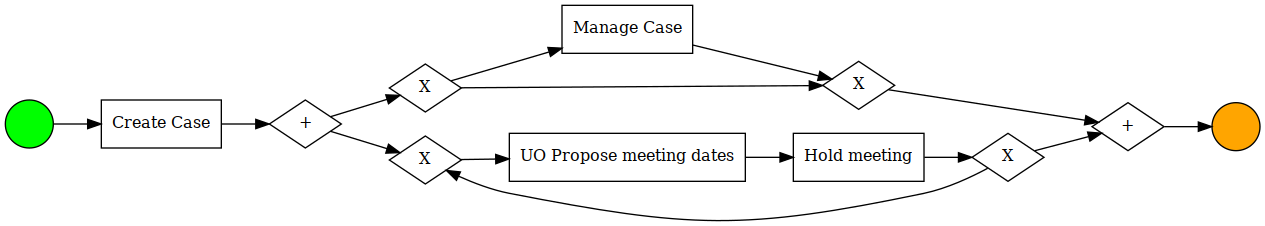

In [45]:
view_bpmn(loda_bpmn)